# Random forest classifier

Used this tutorial:
https://www.datacamp.com/community/tutorials/random-forests-classifier-python#building

In [1]:
import pandas as pd

data = pd.read_csv("kommune_multivariate.csv")
data.head()

,Unnamed: 0,Spraak,Q1_natur_kom_1,Q1_natur_kom_2,Q1_natur_kom_3,Q1_kultur_kom_1,Q1_kultur_kom_2,Q1_kultur_kom_3,Q1_kultur_kom_4,Q1_kultur_kom_5,...,Kommunestr,Fylke,Q49a,Sentralitet,Q57a,Q58a,Q63a,Q67a,Q53a,Q54a
0,0,1.0,4.0,3.0,4.0,6.0,6.0,6.0,6.0,4.000000,...,3.0,18,2.0,3.0,5.0,0.0,4.0,9999.0,4.0,2.0
1,1,1.0,5.0,3.0,3.0,6.0,4.0,6.0,4.0,5.000000,...,3.0,18,5.0,3.0,3.0,0.0,4.0,2.0,2.0,0.0
2,2,1.0,7.0,6.0,6.0,6.0,6.0,4.0,5.0,6.011713,...,3.0,1,5.0,4.0,4.0,0.0,4.0,1.0,2.0,0.0
3,3,1.0,6.0,6.0,3.0,3.0,2.0,2.0,2.0,4.000000,...,3.0,6,4.0,4.0,1.0,2.0,3.0,1.0,4.0,2.0
4,4,1.0,4.0,7.0,6.0,5.0,5.0,5.0,1.0,6.000000,...,1.0,18,NaN,2.0,1.0,2.0,4.0,NaN,5.0,2.0


In [2]:
data.shape

(3359, 97)

In [3]:
data = data.drop(['Unnamed: 0'],axis=1)
data = data.drop(['Id'],axis=1)

In [4]:
print(data.shape)
data = data.dropna() 
print(data.shape)

(3359, 95)
(2966, 95)


In [5]:
data = data[data.Q16 != 11.0]
data = data[data.Q16 != 12.0]
data = data[data.Q16 != 13.0]

In [6]:
import math
import numpy as np

shuffled = data.iloc[np.random.permutation(len(data))]

test = shuffled[:280] 
train = shuffled[280:]

test_y = test["Q16"]
train_y = train["Q16"]

test_X = test.drop(['Q16'],axis=1).values
train_X = train.drop(['Q16'],axis=1).values

### Create random forest classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=5000)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(train_X,train_y)

y_pred=clf.predict(test_X)

### Calculate accuracy

In [8]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

Accuracy: 0.3357142857142857


In [9]:
print(clf.predict(test_X[:10]))
print(test_y[:10])

[3. 3. 3. 3. 3. 1. 3. 1. 1. 1.]
623     1.0
373     7.0
3256    2.0
3249    5.0
1419    8.0
1017    6.0
2589    5.0
2390    3.0
2850    7.0
2575    2.0
Name: Q16, dtype: float64


### Calculate feature importance

In [27]:
# Feature importance scores
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=list(data.drop(['Q16'],axis=1))).sort_values(ascending=False)

for i in range(len(feature_imp)):
    print(str(feature_imp[i]) + "\t" + str(feature_imp.index[i]))

1.5718355950646563e-05	Q65a_4
0.00022311277567111428	Q65ana
0.0007998336424147996	Q68a
0.0014129676696754982	Q65a_2
0.0015945362641207792	Q65a_3
0.0021472131560696635	Q65a_1
0.0023576355831698157	Q55a_1
0.0025494617149522977	Q55a_2
0.0028945167484811596	Q64a_5
0.002911575217908385	Q64a_3
0.0029364835596142383	Q65a_5
0.0029412000876690627	Q55a_4
0.0030018954456698626	Q55a_9
0.003186842867800207	Q62a
0.003263514119119598	Q55a_3
0.0036861849048329025	Spraak
0.003700325628506176	Q64a_1
0.00431381631319598	Q46a
0.004367910683415594	Q65a_6
0.004530457361427849	Q48a
0.004749022814797858	Q64a_2
0.004848951926313972	Q64a_9
0.005203458172111436	Q64a_7
0.005316552551818347	Q64a_6
0.005860282721652163	Q67a
0.005960076531150653	Q18
0.006072440280135743	Q15_4
0.006164816278257719	Q15_1
0.006323346456521265	Q64a_8
0.006580704088463035	Q15_2
0.0067212902851968934	Q64a_4
0.0068061290041593735	Q15_3
0.007646689867471361	Q54a
0.007664088851889691	Q57a
0.00817919541453348	Q49a
0.008464773468943834	Q60a
0.

### Visualizing feature importance

No handles with labels found to put in legend.


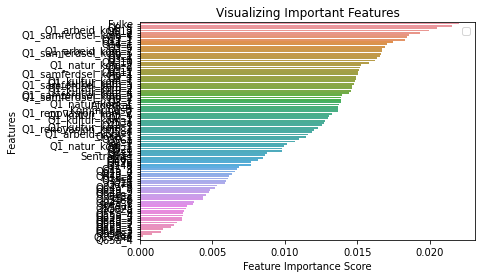

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()